In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# torch stuff
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

# we use GPU if available, otherwise CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
# return N data drawn according to the wanted density
def f_data(N, model="circle"):
    eps = np.random.randn(N)  # Gaussian noise
    if model == "circle":
        t = np.random.rand(N)  # Uniform
        return np.column_stack(
            (3 * np.cos(t * 2 * np.pi) + 0.1 * eps, 3 * np.sin(t * 2 * np.pi) + 0.1 * eps)
        )

    z1 = np.random.randn(N)  # Gaussian
    if model == "simple_sin":
        return np.column_stack((3 * z1 + 0.1 * eps, np.cos(3 * z1) + 0.1 * eps))
    elif model == "double_sin":
        z2 = np.random.randn(N)  # Gaussian (2)
        return np.column_stack((3 * z1 + 0.1 * eps, np.cos(3 * z1) + np.tanh(3 * z2) + 0.1 * eps))

In [3]:
class Generator(nn.Module):
    def __init__(self, sz_latent, sz_hidden):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(sz_latent, sz_hidden)
        self.fc2 = nn.Linear(sz_hidden, sz_hidden)
        self.fout = nn.Linear(sz_hidden, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fout(x)
        return x

In [4]:
class Discriminator(nn.Module):
    def __init__(self, sz):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(2, sz)
        self.fc2 = nn.Linear(sz, int(sz / 2))
        self.fc3 = nn.Linear(int(sz / 2), int(sz / 4))
        self.fout = nn.Linear(int(sz / 4), 1)  # output size==1 : raw score

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fout(x))  # sigmoid(raw score) -> decision (proba)
        return x

Epoch 0: D (0.5188 real_err, 0.8988 fake_err) G (0.5237 err) 


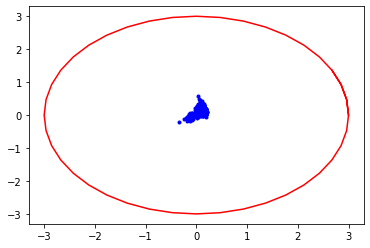

Epoch 20: D (0.4984 real_err, 0.7225 fake_err) G (0.6651 err) 
Epoch 40: D (0.0938 real_err, 0.4229 fake_err) G (1.0692 err) 
Epoch 60: D (0.2266 real_err, 0.2189 fake_err) G (1.3673 err) 


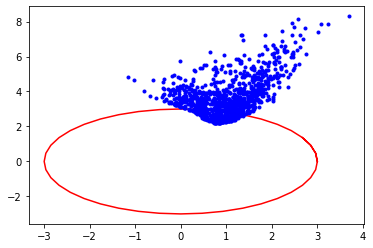

Epoch 80: D (0.9080 real_err, 0.4619 fake_err) G (0.7626 err) 
Epoch 100: D (0.7949 real_err, 0.5464 fake_err) G (0.8887 err) 
Epoch 120: D (0.8096 real_err, 0.6106 fake_err) G (0.7133 err) 


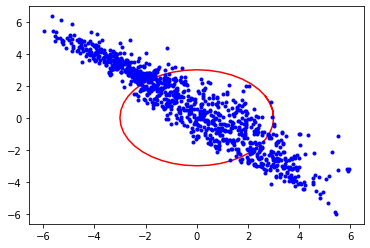

Epoch 140: D (0.4888 real_err, 0.6091 fake_err) G (0.7955 err) 
Epoch 160: D (0.5595 real_err, 0.5155 fake_err) G (0.8886 err) 
Epoch 180: D (0.6080 real_err, 0.6975 fake_err) G (0.7081 err) 


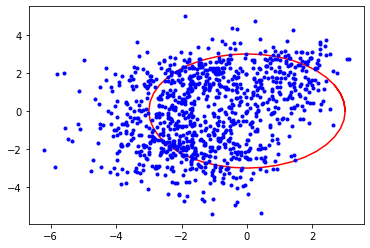

Epoch 200: D (0.7383 real_err, 0.6225 fake_err) G (0.7168 err) 
Epoch 220: D (0.7366 real_err, 0.6494 fake_err) G (0.7306 err) 
Epoch 240: D (0.7245 real_err, 0.6504 fake_err) G (0.7376 err) 


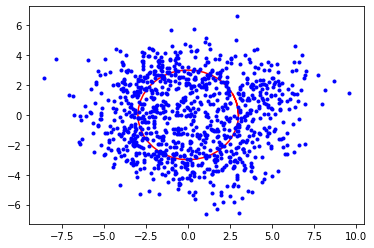

Epoch 260: D (0.7161 real_err, 0.6560 fake_err) G (0.7415 err) 
Epoch 280: D (0.6957 real_err, 0.6574 fake_err) G (0.7216 err) 
Epoch 300: D (0.6637 real_err, 0.6700 fake_err) G (0.7117 err) 


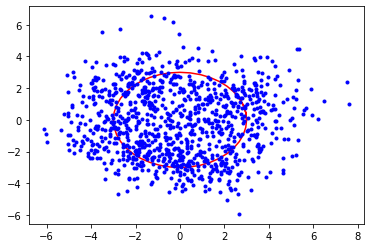

Epoch 320: D (0.6567 real_err, 0.6860 fake_err) G (0.6929 err) 
Epoch 340: D (0.6712 real_err, 0.6526 fake_err) G (0.7274 err) 
Epoch 360: D (0.6703 real_err, 0.6500 fake_err) G (0.7626 err) 


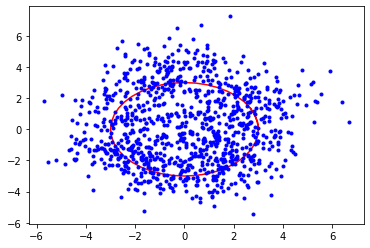

Epoch 380: D (0.6289 real_err, 0.6319 fake_err) G (0.7544 err) 
Epoch 400: D (0.6145 real_err, 0.5498 fake_err) G (0.8356 err) 
Epoch 420: D (0.5464 real_err, 0.5655 fake_err) G (1.0425 err) 


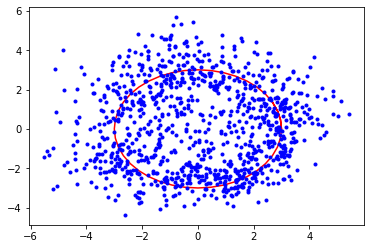

Epoch 440: D (0.4944 real_err, 0.5608 fake_err) G (1.1876 err) 
Epoch 460: D (0.6287 real_err, 0.5409 fake_err) G (1.1551 err) 
Epoch 480: D (0.5250 real_err, 0.5281 fake_err) G (1.1049 err) 


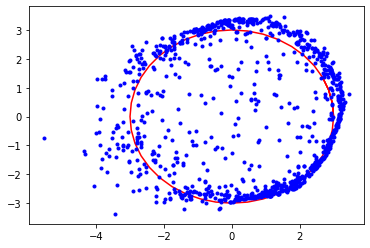

Epoch 500: D (0.5734 real_err, 0.5870 fake_err) G (0.8948 err) 
Epoch 520: D (0.5507 real_err, 0.5969 fake_err) G (0.7817 err) 
Epoch 540: D (0.6656 real_err, 0.6063 fake_err) G (0.6629 err) 


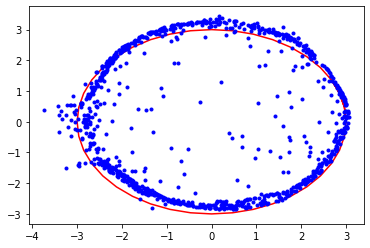

Epoch 560: D (0.7116 real_err, 0.5629 fake_err) G (0.8257 err) 
Epoch 580: D (0.7560 real_err, 0.5246 fake_err) G (0.6876 err) 
Epoch 600: D (0.6387 real_err, 0.6044 fake_err) G (0.8111 err) 


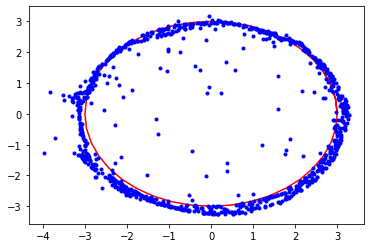

Epoch 620: D (0.5961 real_err, 0.6437 fake_err) G (0.5590 err) 
Epoch 640: D (0.7022 real_err, 0.6263 fake_err) G (0.6278 err) 
Epoch 660: D (0.6881 real_err, 0.6387 fake_err) G (0.9218 err) 


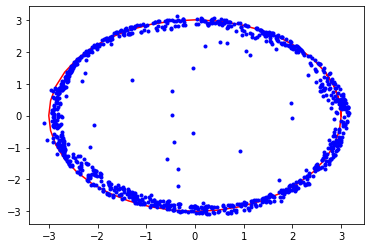

Epoch 680: D (0.6905 real_err, 0.5881 fake_err) G (0.6692 err) 
Epoch 700: D (0.6664 real_err, 0.7095 fake_err) G (0.6829 err) 
Epoch 720: D (0.6806 real_err, 0.6825 fake_err) G (0.6856 err) 


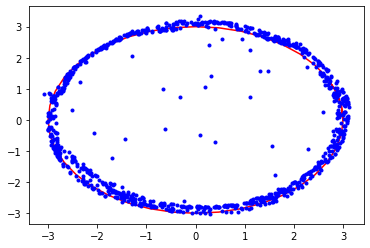

Epoch 740: D (0.7241 real_err, 0.6297 fake_err) G (0.6794 err) 
Epoch 760: D (0.6885 real_err, 0.6984 fake_err) G (0.7791 err) 
Epoch 780: D (0.6886 real_err, 0.6833 fake_err) G (0.8590 err) 


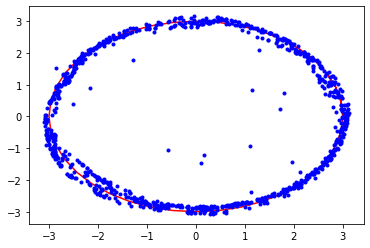

Epoch 800: D (0.6728 real_err, 0.6172 fake_err) G (0.8226 err) 
Epoch 820: D (0.6670 real_err, 0.6849 fake_err) G (0.6765 err) 
Epoch 840: D (0.7036 real_err, 0.6866 fake_err) G (0.6967 err) 


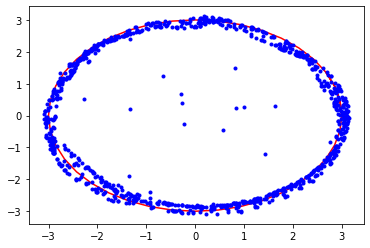

Epoch 860: D (0.6846 real_err, 0.6660 fake_err) G (0.6835 err) 
Epoch 880: D (0.6716 real_err, 0.7094 fake_err) G (0.6777 err) 
Epoch 900: D (0.6851 real_err, 0.6975 fake_err) G (0.6818 err) 


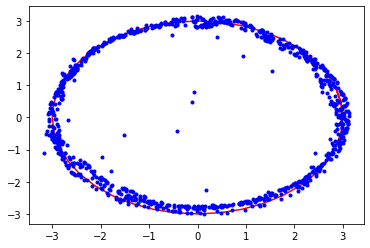

Epoch 920: D (0.7413 real_err, 0.7037 fake_err) G (0.6880 err) 


KeyboardInterrupt: 

In [5]:
model = "circle"
n_epochs = 2000
latent_dim = 2

def extract(v):
    return v.data.storage().tolist()

G = Generator(latent_dim, 32).to(device)
D = Discriminator(32).to(device)

criterion = nn.BCELoss()
d_optimizer = optim.SGD(D.parameters(), lr=1e-3, momentum=0.8)
g_optimizer = optim.SGD(G.parameters(), lr=1e-3, momentum=0.8)

batch_size = 32

for epoch in range(n_epochs):
    for ii in range(20):  # train D for 20 steps
        D.zero_grad()  # could be d_optimizer.zero_grad() since the optimizer is specific to the model

        # train D on real data
        d_real_data = Variable(torch.FloatTensor(f_data(batch_size, model))).to(device)
        d_real_data = Variable(torch.FloatTensor(f_data(batch_size, model))).to(device)
        d_real_decision = D(d_real_data)
        d_real_error = criterion(
            d_real_decision, Variable(torch.ones([batch_size, 1])).to(device)
        )  # ones = true
        d_real_error.backward()  # compute/store gradients, but don't change params

        # train D on fake data
        d_gen_seed = Variable(torch.FloatTensor(torch.randn(batch_size, latent_dim))).to(
            device
        )
        d_fake_data = G(d_gen_seed).detach()  # detach to avoid training G on these labels
        d_fake_decision = D(d_fake_data)
        d_fake_error = criterion(
            d_fake_decision, Variable(torch.zeros([batch_size, 1]).to(device))
        )  # zeros = fake
        d_fake_error.backward()
        d_optimizer.step()  # Only optimizes D's parameters; changes based on stored gradients from backward()

        dre, dfe = extract(d_real_error)[0], extract(d_fake_error)[0]

    for ii in range(20):  # train G for 20 steps
        G.zero_grad()

        g_gen_seed = Variable(torch.FloatTensor(torch.randn(batch_size, latent_dim))).to(
            device
        )
        g_fake_data = G(g_gen_seed)
        dg_fake_decision = D(g_fake_data)
        g_error = criterion(
            dg_fake_decision, Variable(torch.ones([batch_size, 1]).to(device))
        )  # Train G to pretend it's genuine

        g_error.backward()
        g_optimizer.step()  # Only optimizes G's parameters

        ge = extract(g_error)[0]
    if epoch % 20 == 0:
        print(
            "Epoch %s: D (%1.4f real_err, %1.4f fake_err) G (%1.4f err) "
            % (epoch, dre, dfe, ge)
        )

    if epoch % 60 == 0:
        g_gen_seed = Variable(torch.FloatTensor(torch.randn(1000, latent_dim))).to(device)
        g_fake_data = G(g_gen_seed).detach().to("cpu")
        plt.cla()

        # plot ground truth
        if model == "circle":
            t = np.arange(0, 1.1, 0.025)
            plt.plot(3 * np.cos(t * 2 * np.pi), 3 * np.sin(t * 2 * np.pi), "r-")
        if model == "simple_sin":
            xx = np.arange(-3, 3, 0.25)
            plt.plot(3 * xx, np.cos(3 * xx), "r-")
        if model == "double_sin":
            xx = np.arange(-3, 3, 0.25)
            plt.plot(3 * xx, np.cos(3 * xx) + 1, "r-")
            plt.plot(3 * xx, np.cos(3 * xx) - 1, "r-")

        # plot generated data
        plt.plot(g_fake_data[:, 0], g_fake_data[:, 1], "b.")
        plt.draw()
        plt.pause(0.001)

        plt.show()
    # if FLAGS.save == True:
    #     filename = "model_gan_" + model + ".pth"
    #     torch.save({"G_state_dict": G.state_dict(), "D_state_dict": D.state_dict()}, filename)